In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
test=pd.read_csv('train.csv')
len(test)
test.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train['type']='train'
test['type']='test'
sample=pd.read_csv('sample_submission.csv')
df=pd.concat([train,test])


In [4]:
print(df.info())

print(df.describe())
df.apply(lambda x: x.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
type                0
Length: 82, dtype: int64

In [5]:
categorical_vars= df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(exclude=['object']).columns
categorical_vars=categorical_vars.drop(['type'])
#train[categorical_vars].describe().T


In [6]:
categorical_vars

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

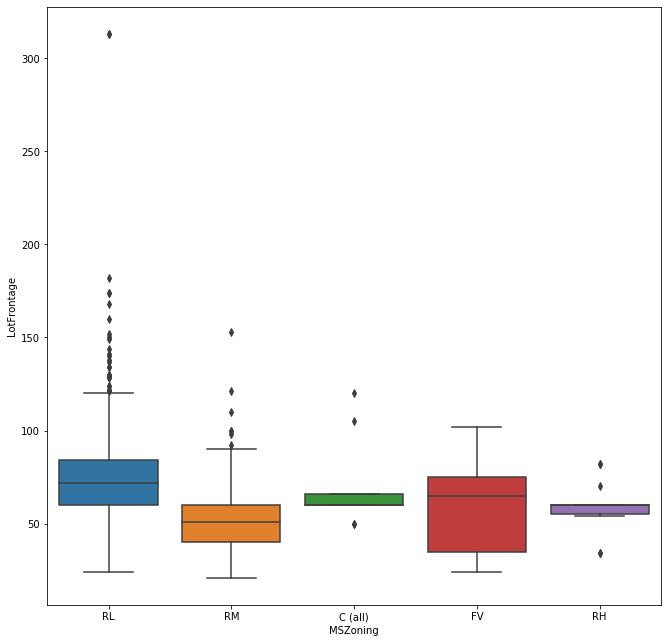

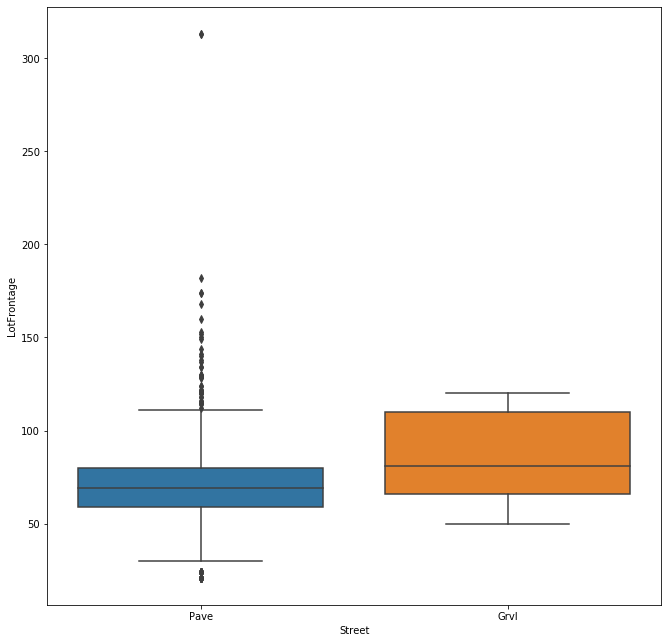

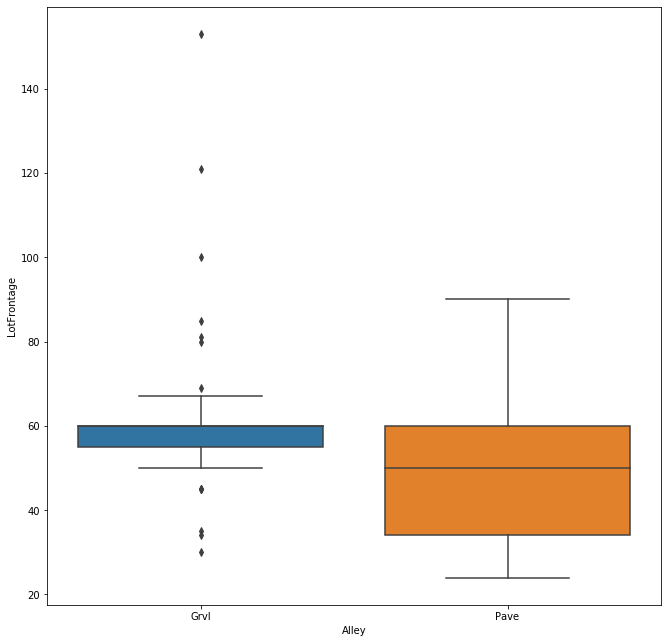

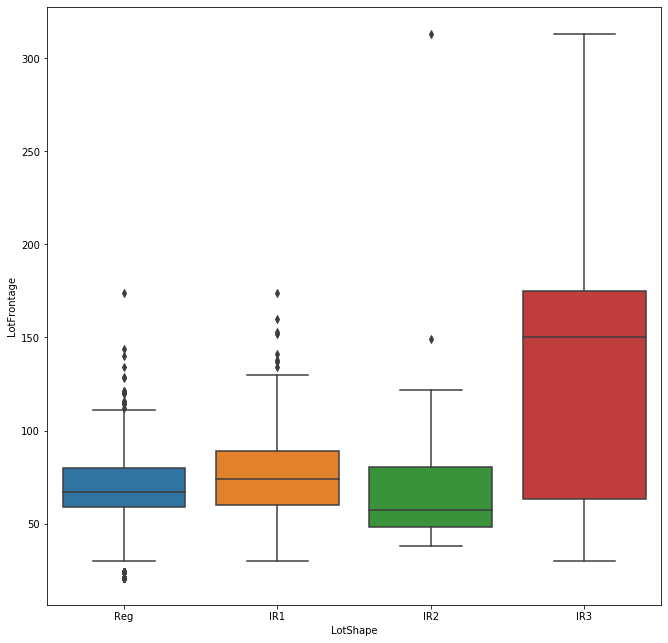

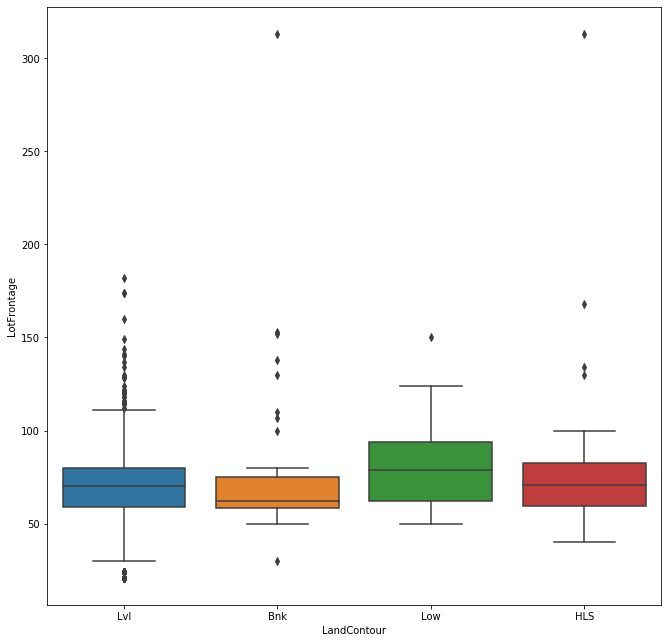

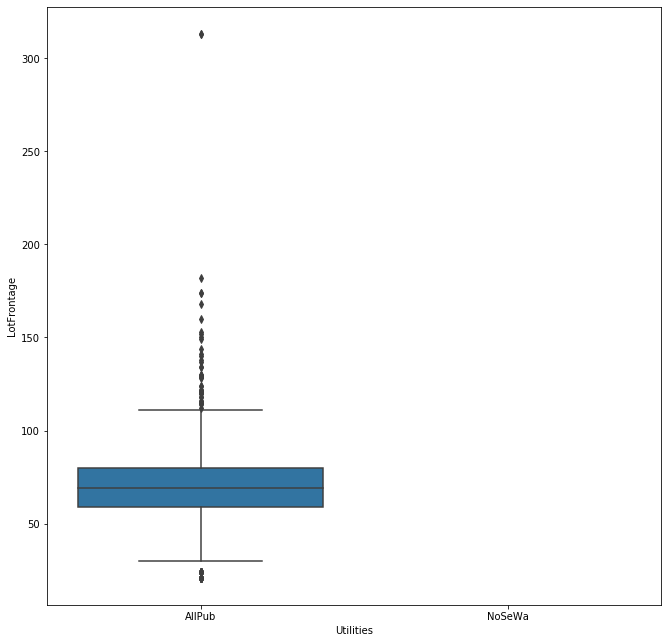

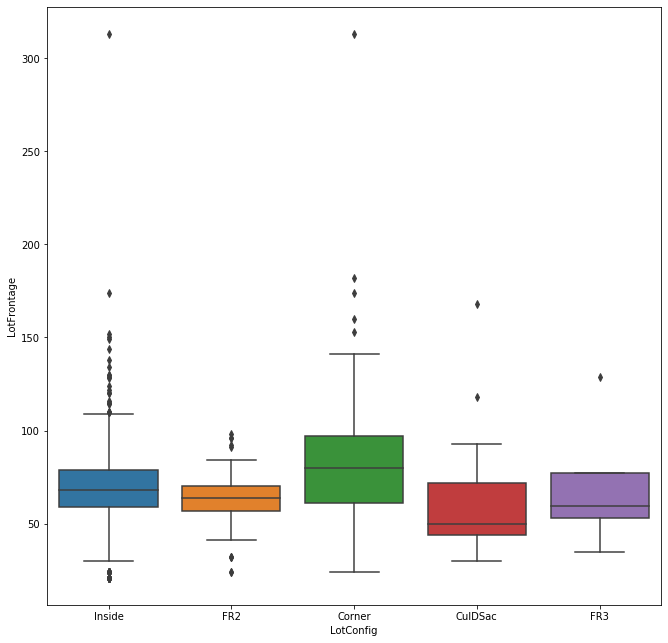

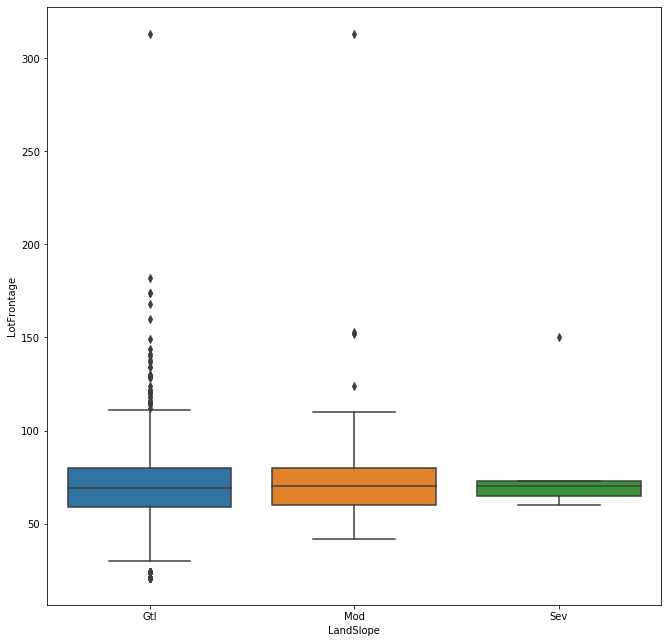

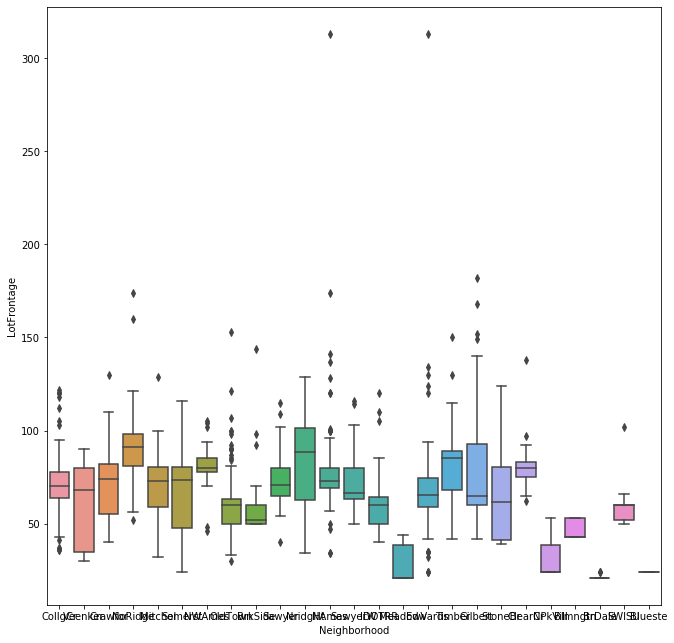

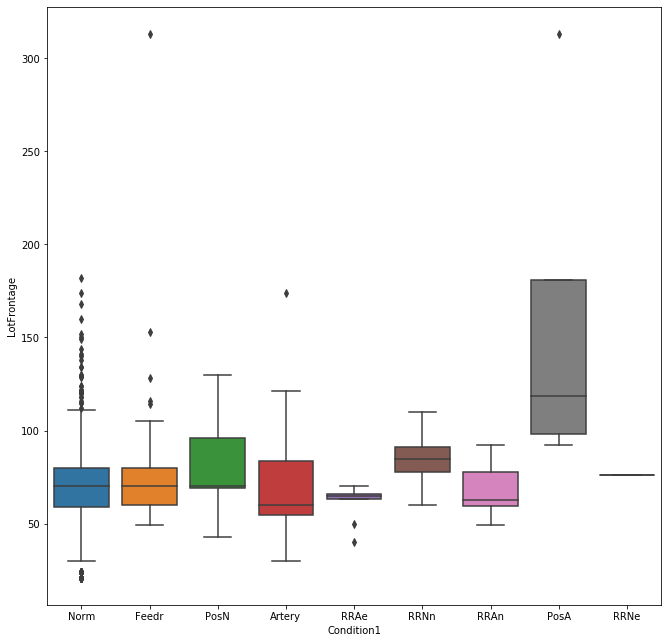

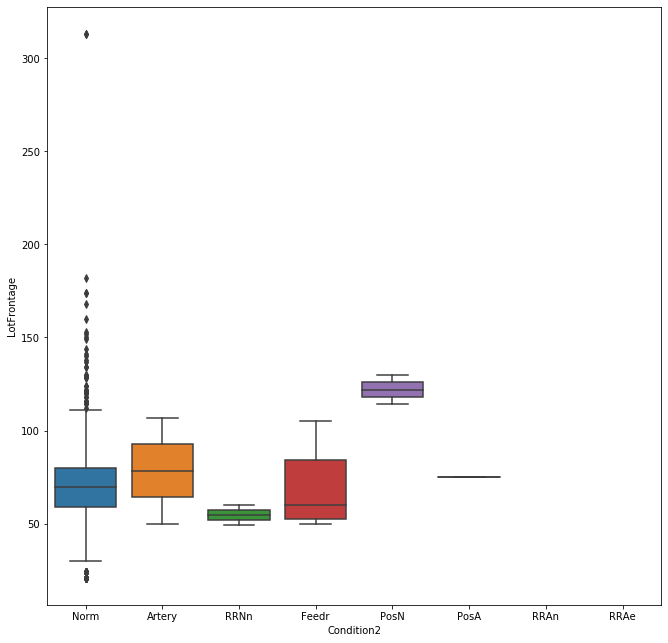

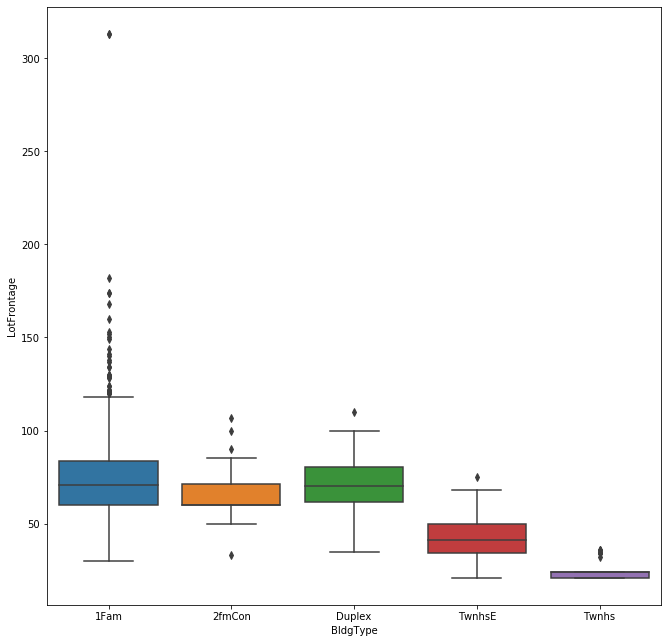

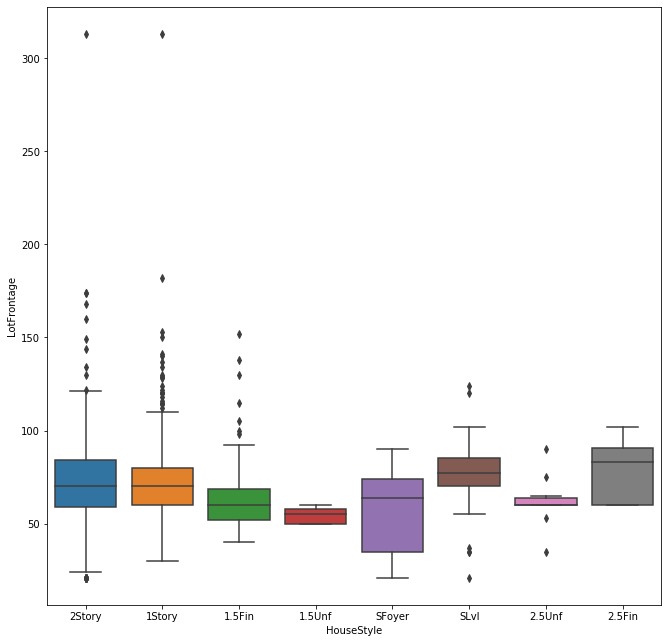

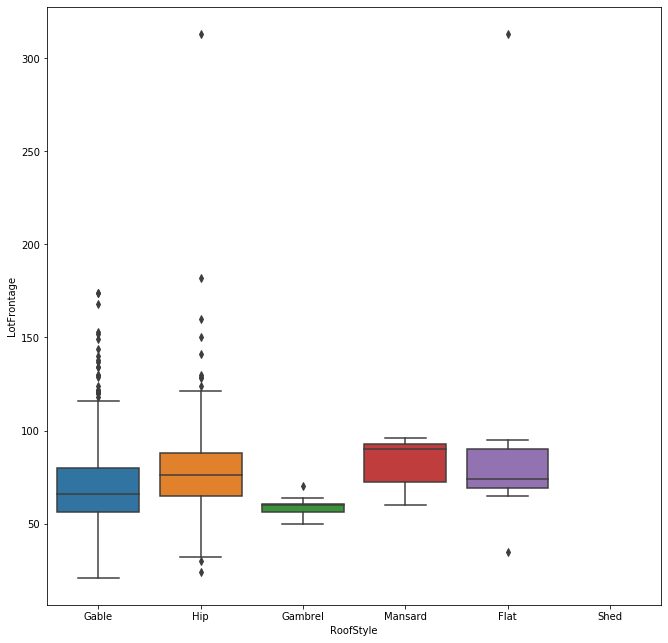

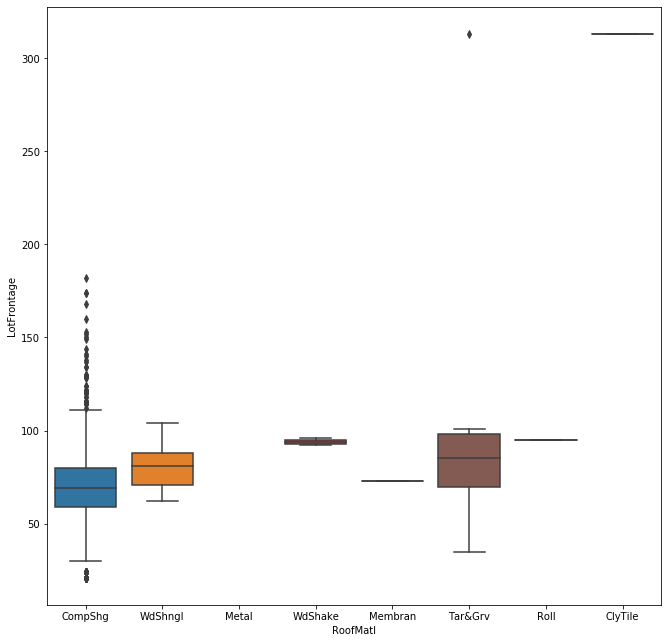

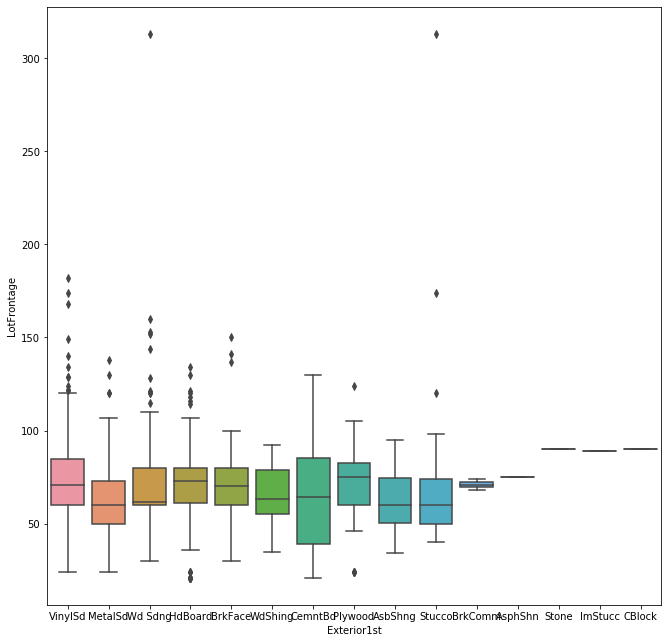

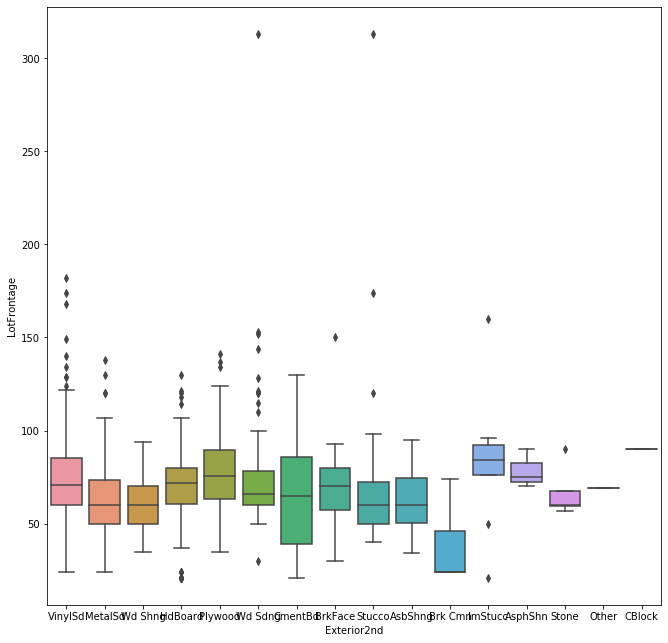

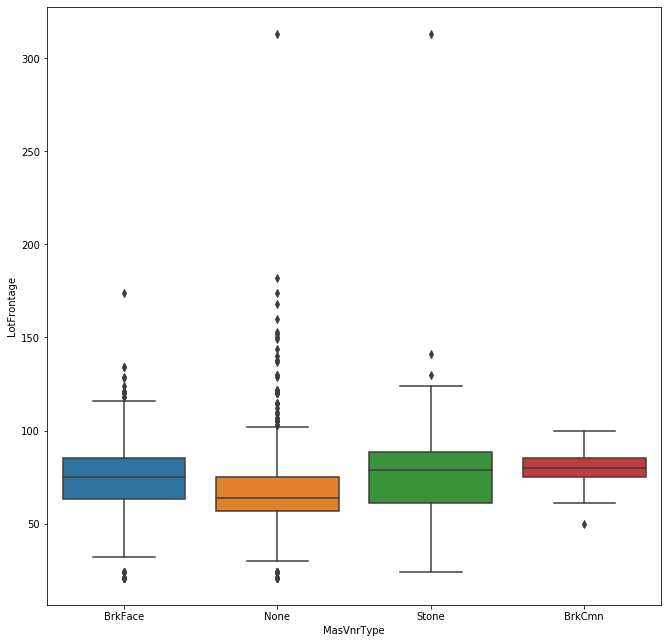

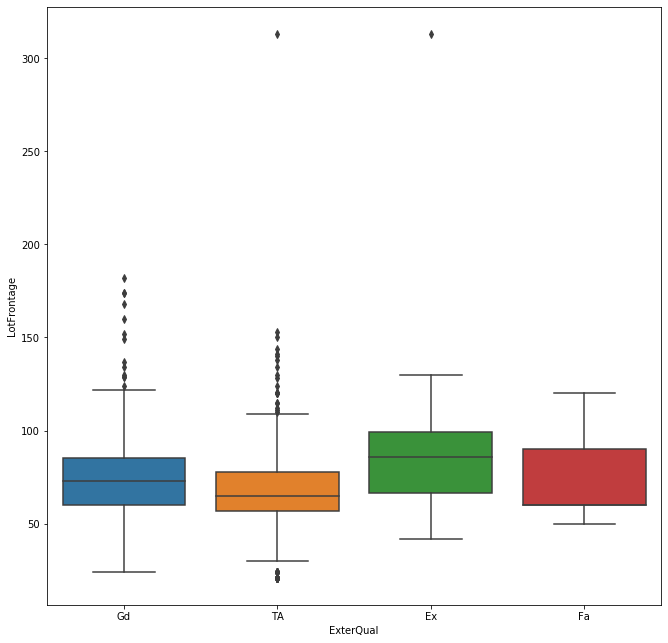

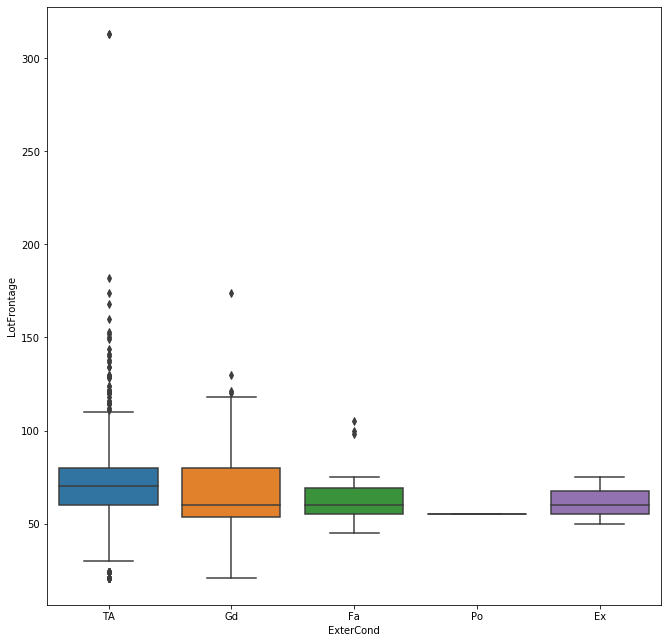

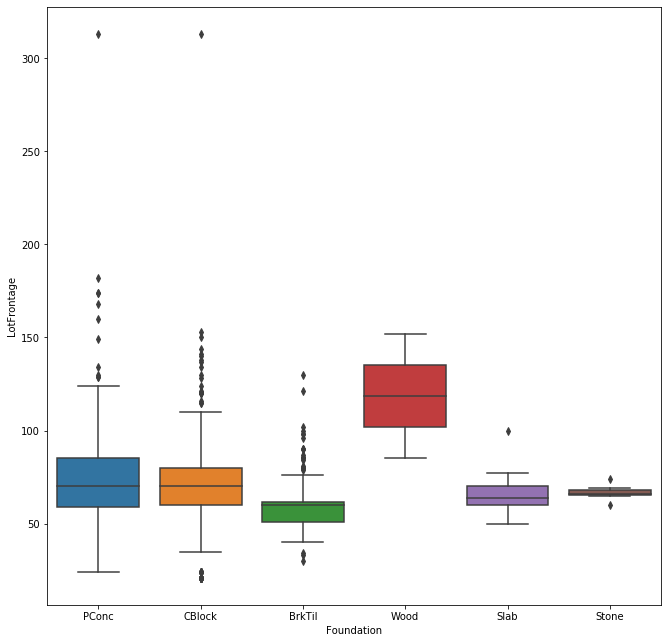

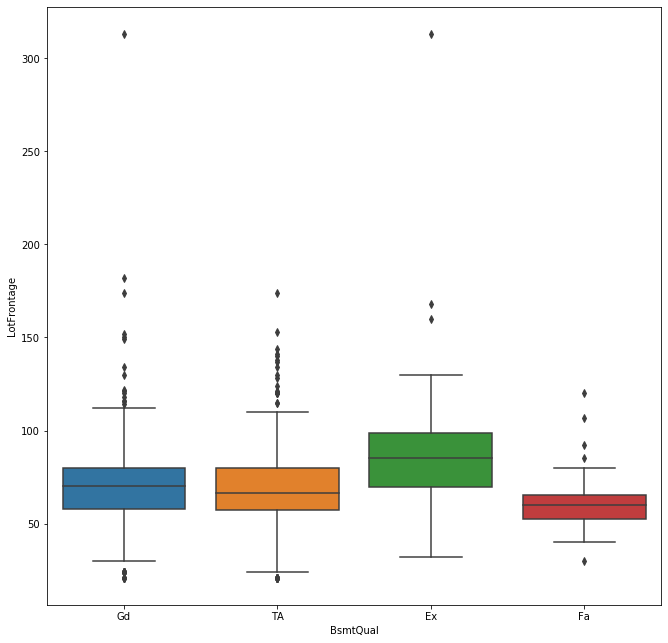

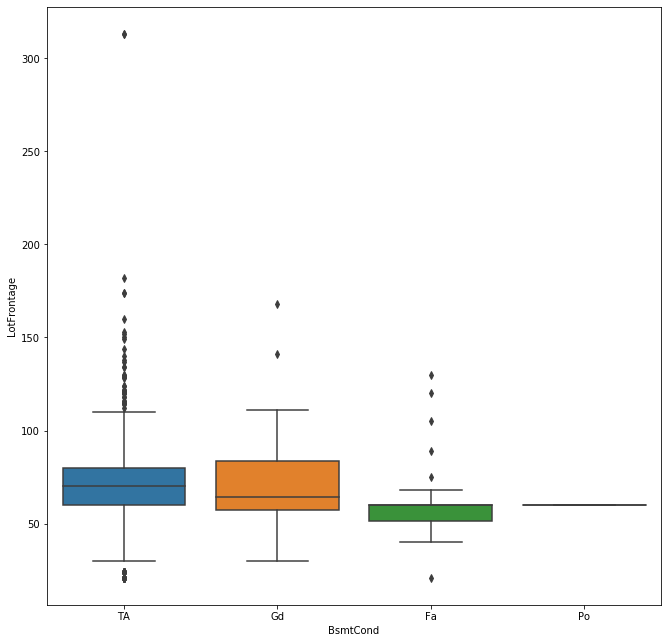

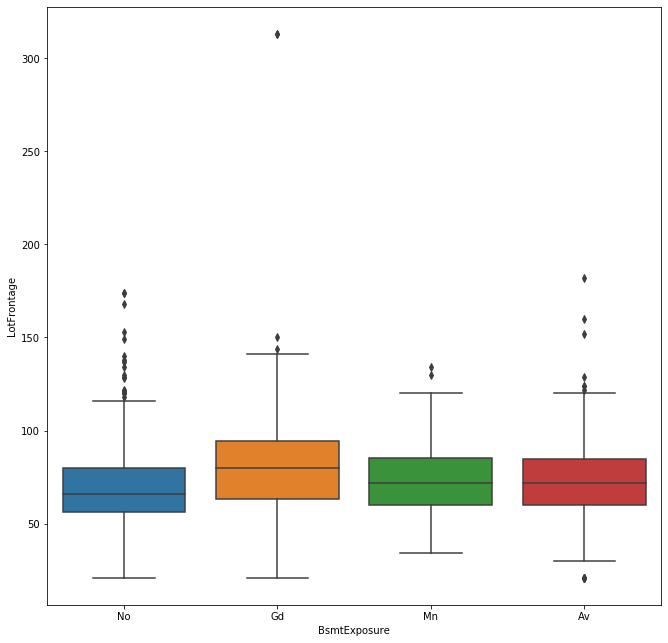

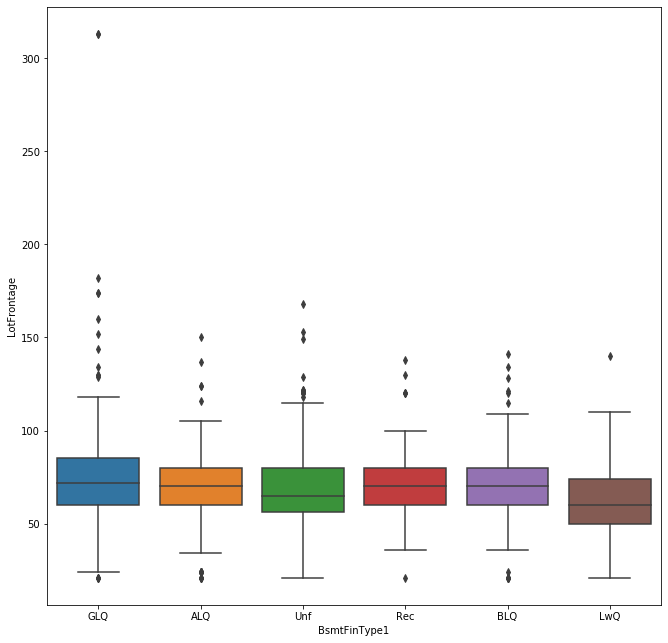

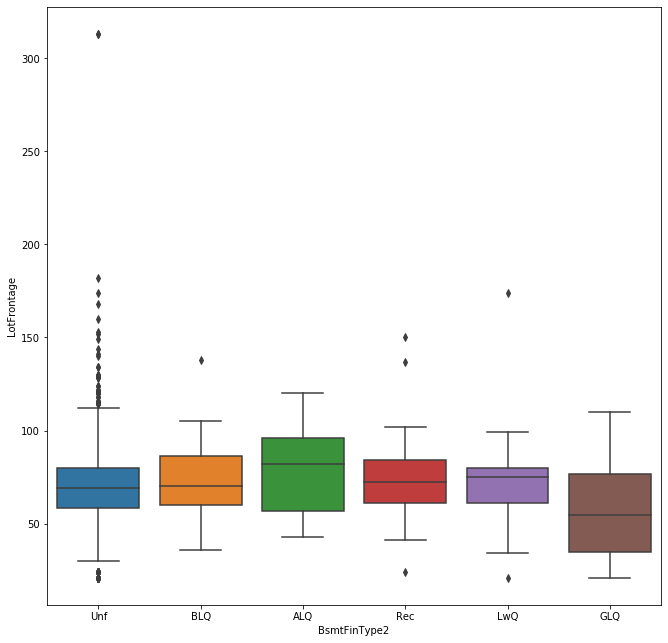

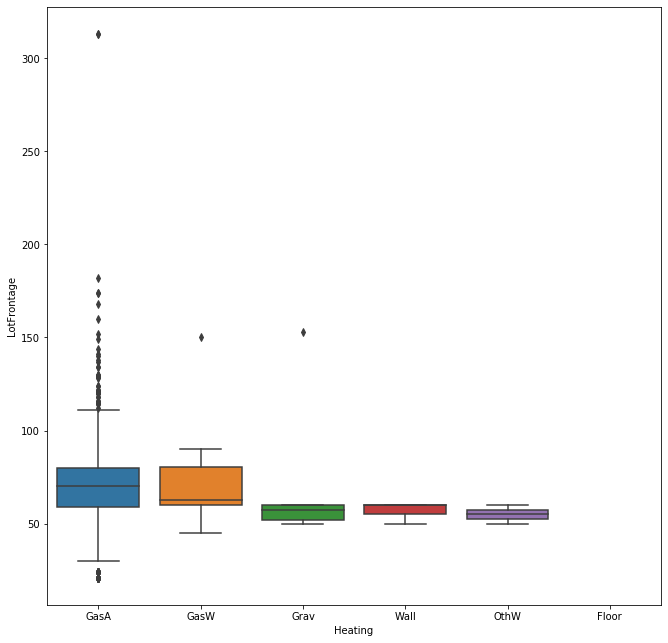

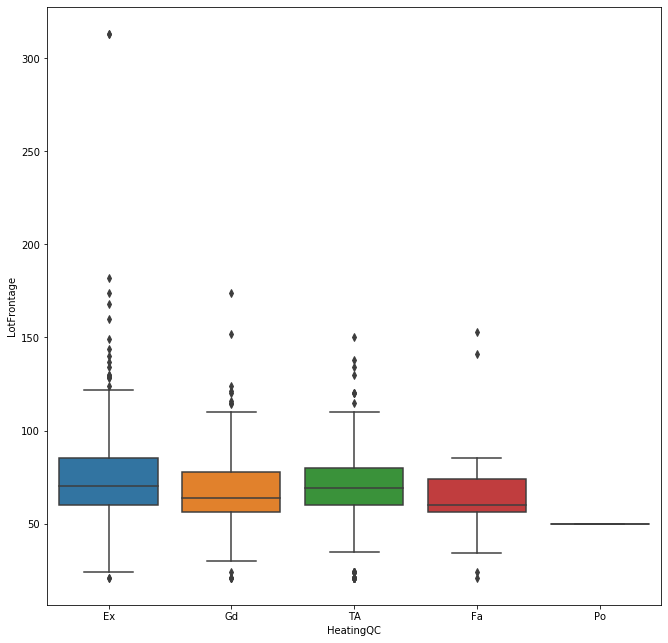

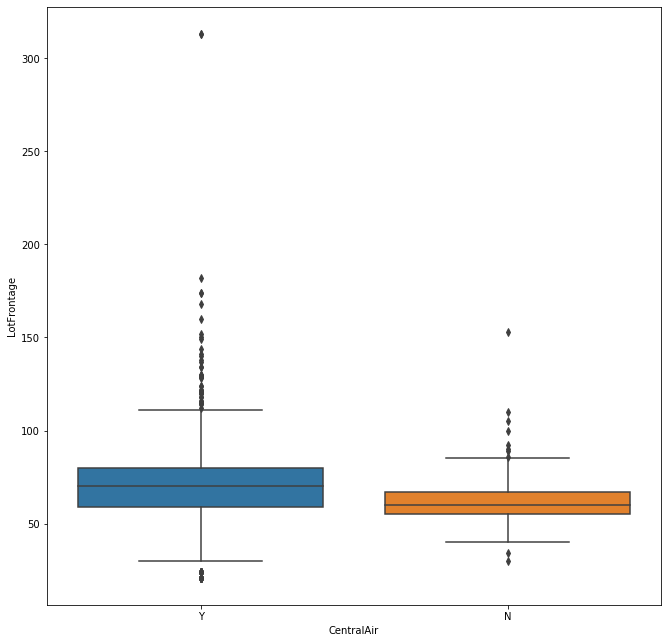

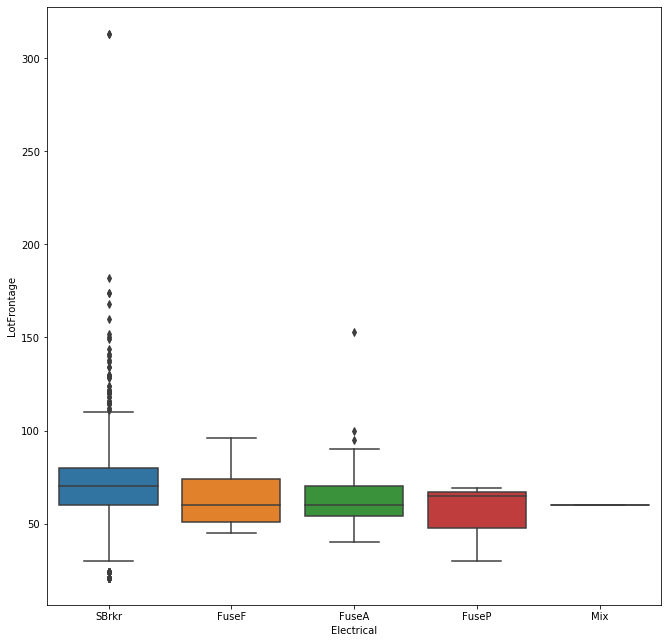

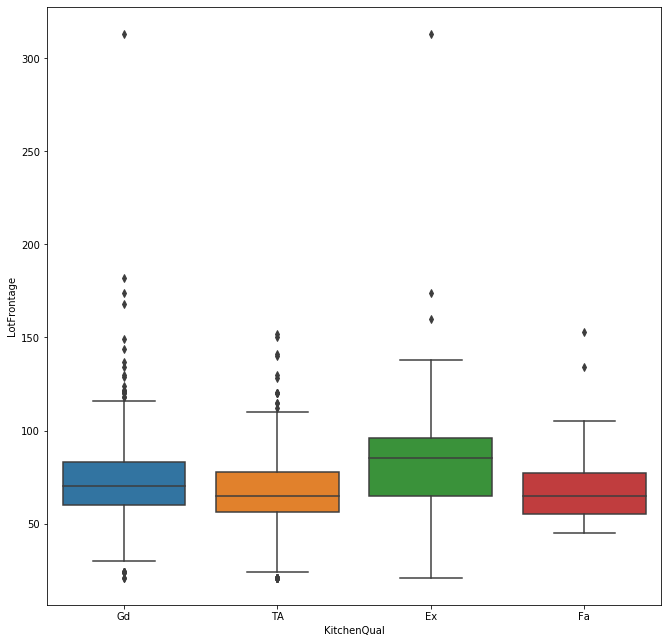

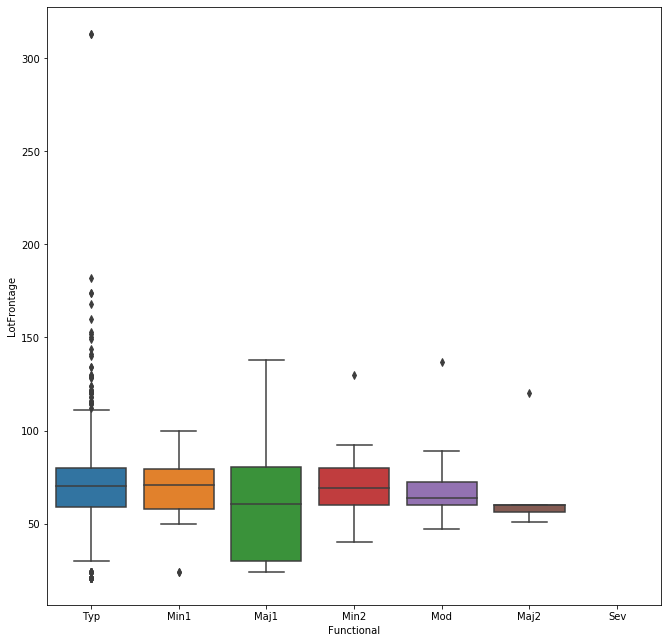

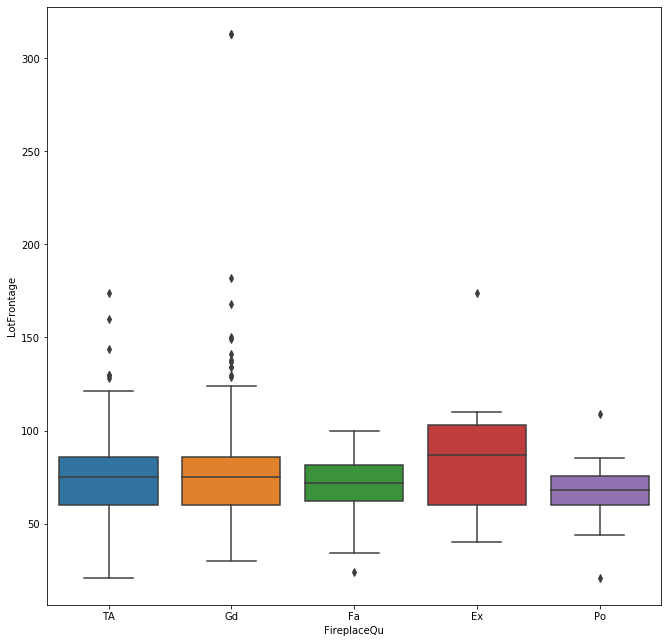

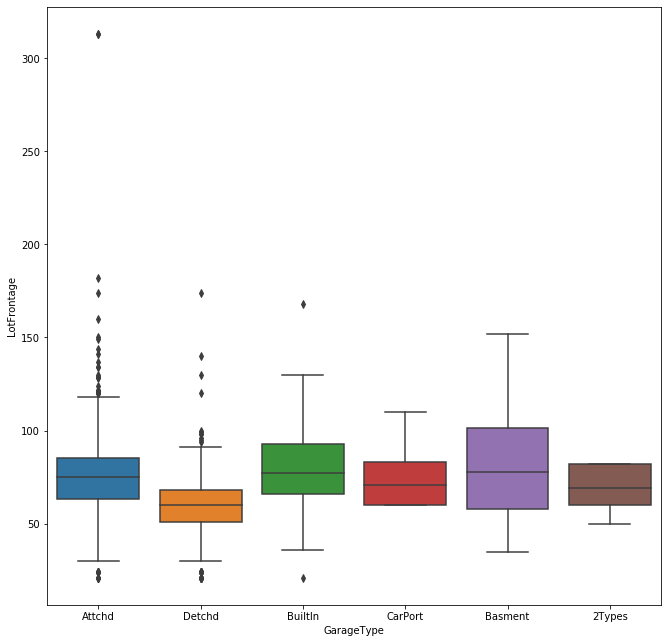

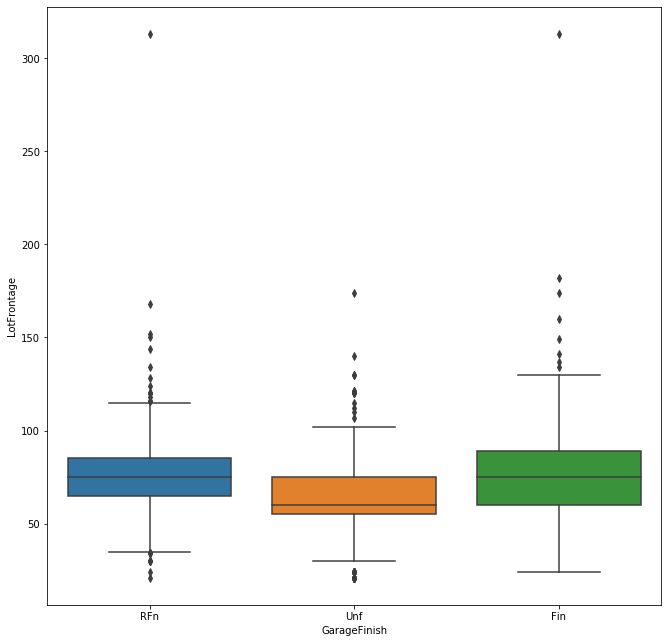

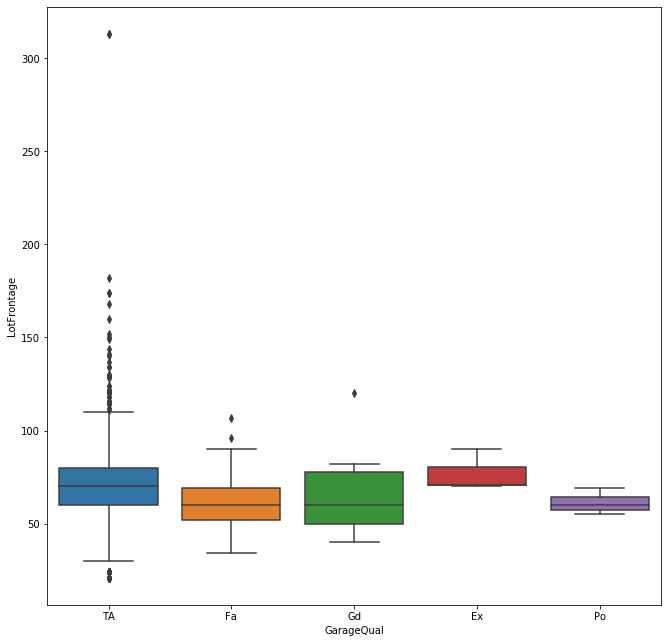

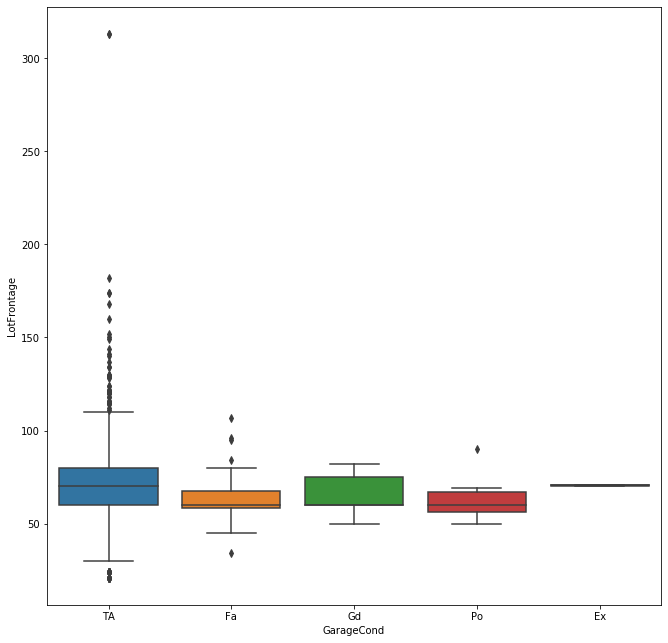

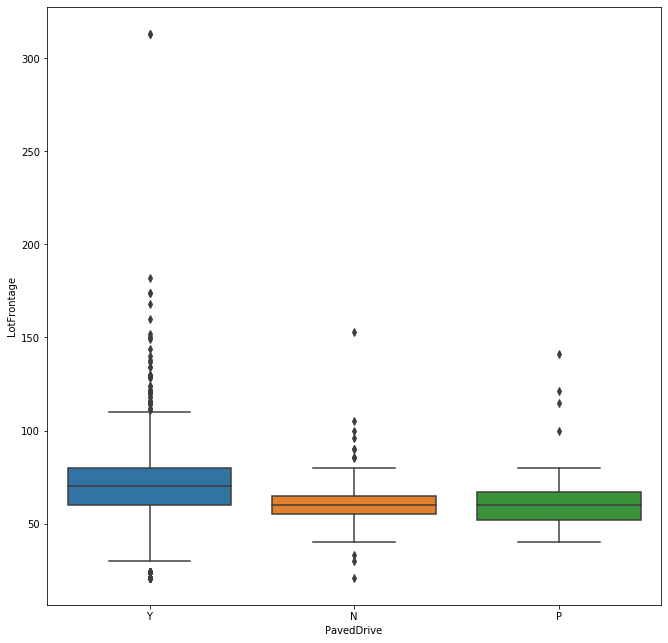

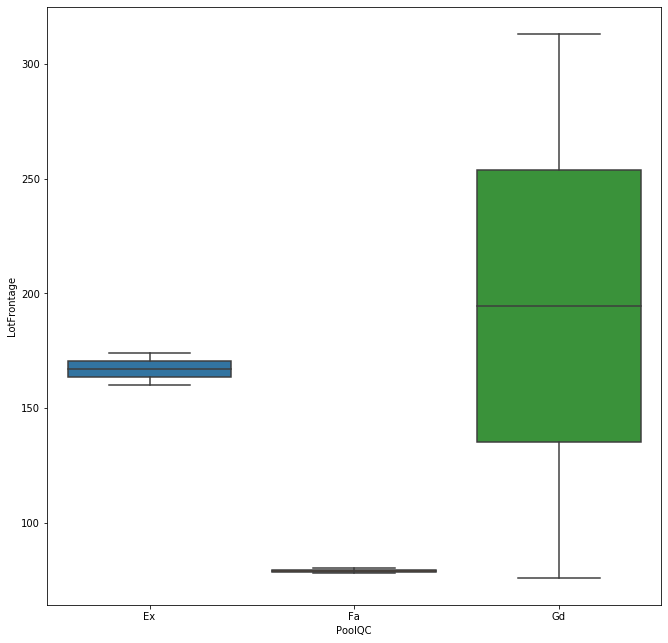

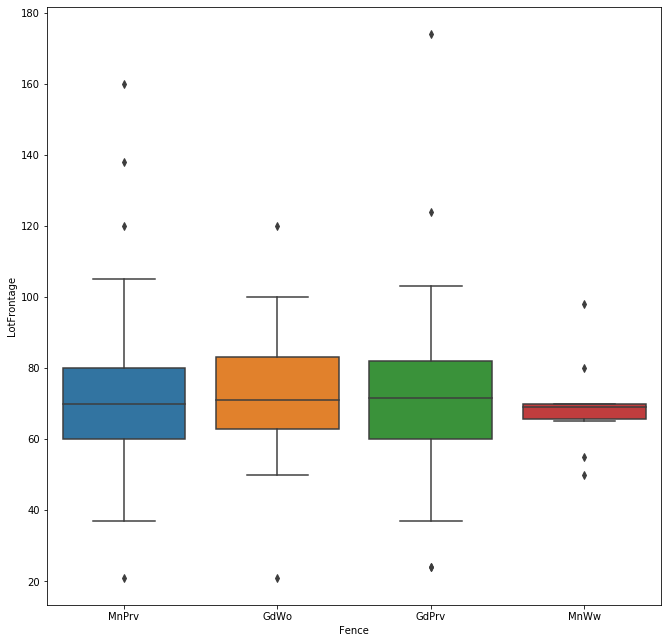

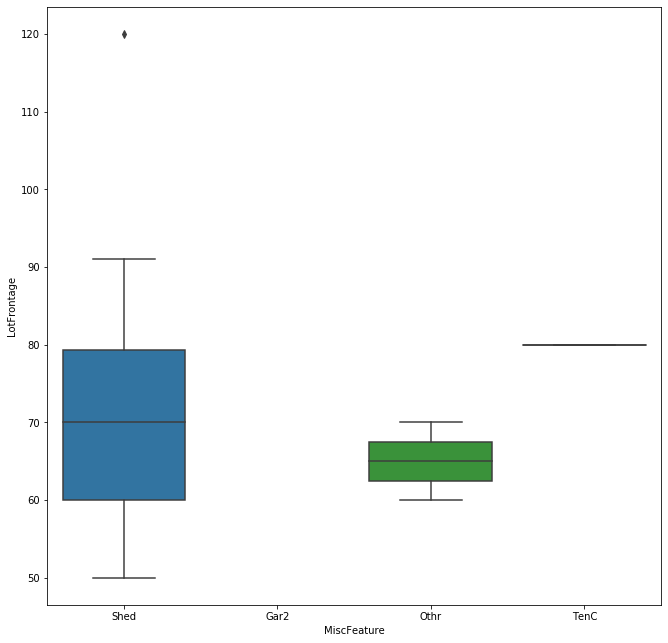

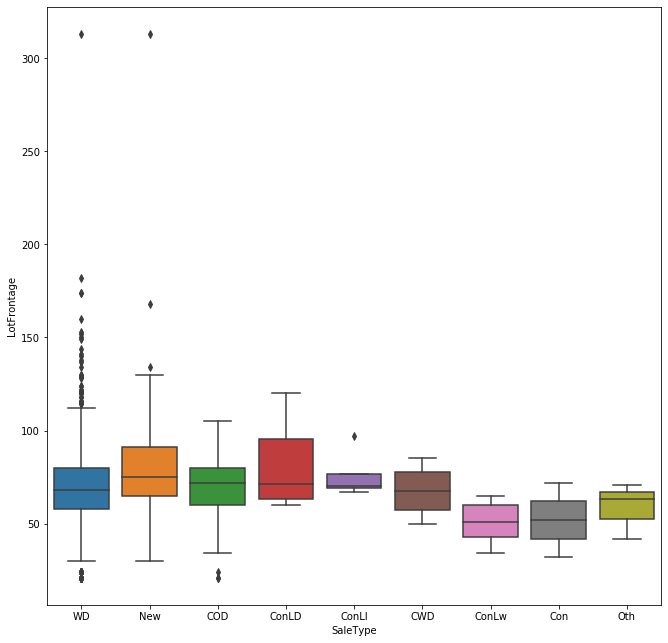

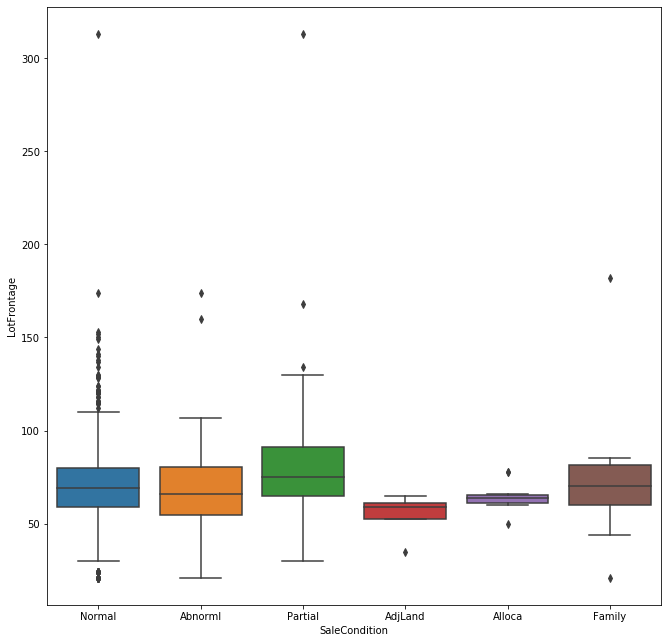

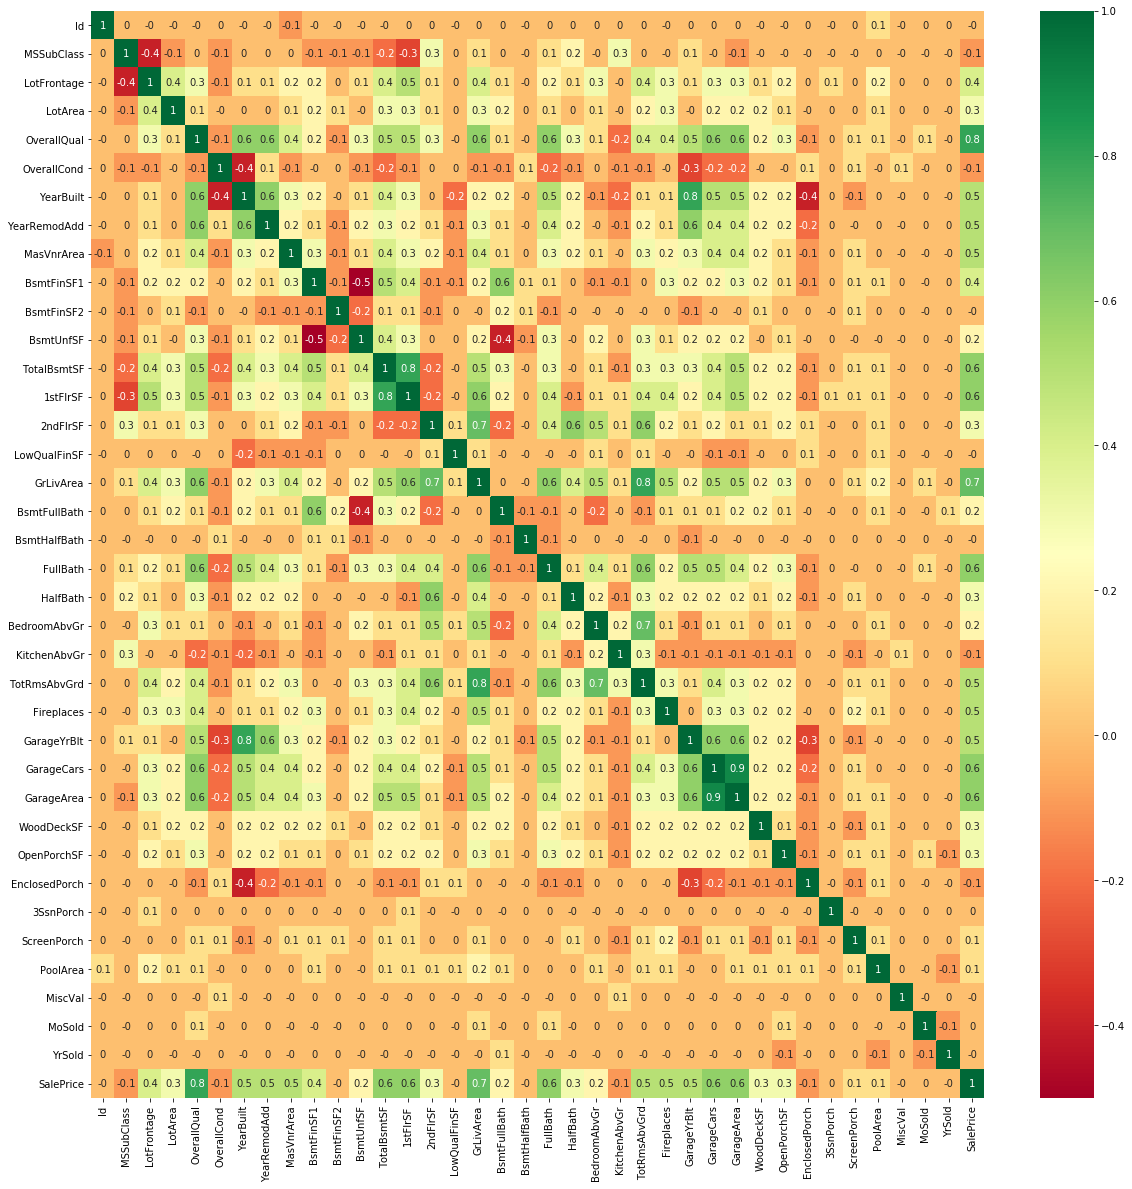

In [7]:
##missing value correction
#columns to check- PoolQC , Fence , MiscFeature, GarageCond, GarageQual, GarageFinish, GarageYrBlt , GarageType, Electrical 
#FireplaceQu , BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond , BsmtQual, MasVnrType, MasVnrArea,  Alley, LotFrontage

train['BsmtExposure'].value_counts().index[0]
train['GarageYrBlt'].median()
#train['LotFrontage']
import seaborn as sns
from matplotlib.pyplot import yticks, xticks, subplots, set_cmap
import matplotlib.pyplot as plt
for i in categorical_vars:
    plt.figure(figsize=(11,11))
    sns.boxplot(x=train[i],y=train['LotFrontage'])
    plt.show()
    plt.close()
#train[train['LotFrontage']
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")
train['Electrical'].value_counts()
train_null_counts=train.apply(lambda x: x.isnull().sum(axis=0))

In [8]:
#missing value imputation for both train & test

df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'],inplace=True)
df['GarageType'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna(df['Electrical'].value_counts().index[0],inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtExposure']=np.where((df['BsmtExposure'].isnull()) & (df['BsmtFinType1']=='NA'),'NA',df['BsmtExposure'])
df['BsmtExposure'].fillna(df['BsmtExposure'].value_counts().index[0],inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)
df['Alley'].fillna('NA',inplace=True) 
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='NA'),df[df['Alley']=='NA'].LotFrontage.mean(),df['LotFrontage'] )
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Grvl'),df[df['Alley']=='Grvl'].LotFrontage.mean(),df['LotFrontage'] )
df['LotFrontage']=np.where((df['LotFrontage'].isnull()) & (df['Alley']=='Pave'),df[df['Alley']=='Pave'].LotFrontage.mean(),df['LotFrontage'] )

#MSZoning , Utilities, Exterior2nd, BsmtFinSF1,BsmtFinSF2,
# BsmtHalfBath, GarageArea
df['Exterior1st'].fillna(df['Exterior1st'].value_counts().index[0],inplace=True)
df['BsmtUnfSF'].fillna(0.0,inplace=True)
df['TotalBsmtSF'].fillna(0.0,inplace=True)
df['BsmtFullBath'].fillna(0.0,inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['GarageCars'].fillna(0.0,inplace=True)
df['MSZoning'].fillna(df['MSZoning'].value_counts().index[0],inplace=True)
df['Utilities'].fillna(df['Utilities'].value_counts().index[0],inplace=True)
df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().index[0],inplace=True)
df['BsmtFinSF1'].fillna(0.0,inplace=True)
df['BsmtFinSF2'].fillna(0.0,inplace=True)
df['BsmtHalfBath'].fillna(0.0,inplace=True)
df['GarageArea'].fillna(0.0,inplace=True)

In [9]:
df['BsmtHalfBath'].value_counts(dropna=False)

0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [10]:
#One Hot Encoding of the Categorical features 
ls=[]
list_df=[]
for i in categorical_vars:
    locals()['df_' + str(i)]=pd.get_dummies(df[i],prefix=i)
    ls.append(locals()['df_' + str(i)])
df.drop(categorical_vars,axis=1,inplace=True)
list_df.append(df)
list_df.extend(ls)
df=pd.concat(list_df,axis=1)    


In [ ]:
#log transformation of numericl features

In [11]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=305)

In [12]:
#df.reset_index(inplace=True)
#df.drop(['level_0','index'],axis=1,inplace=True)
df.shape

(2919, 305)

In [13]:
train=df.head(1459)
test=df.tail(1459)
target=train['SalePrice']
train.drop(['type','SalePrice'],axis=1,inplace=True)
test.drop(['type','SalePrice'],axis=1,inplace=True)

C:\Users\Ankita\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Skewness: 1.881760
Kurtosis: 6.529882


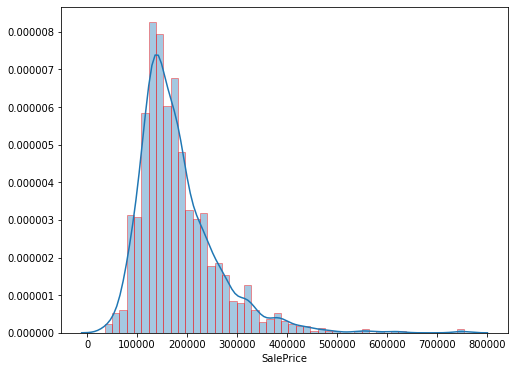

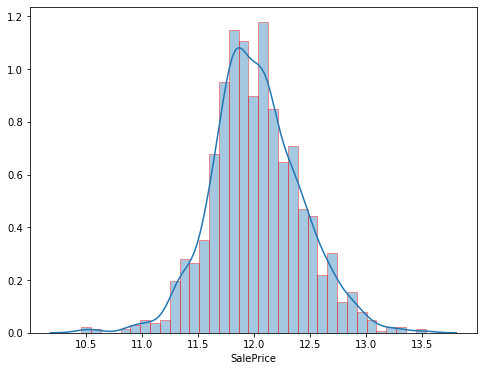

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())
target= np.log1p(target)
plt.figure(figsize=(8,6))
sns.distplot(target,hist_kws={"edgecolor": (1,0,0,1)})  #right skewed

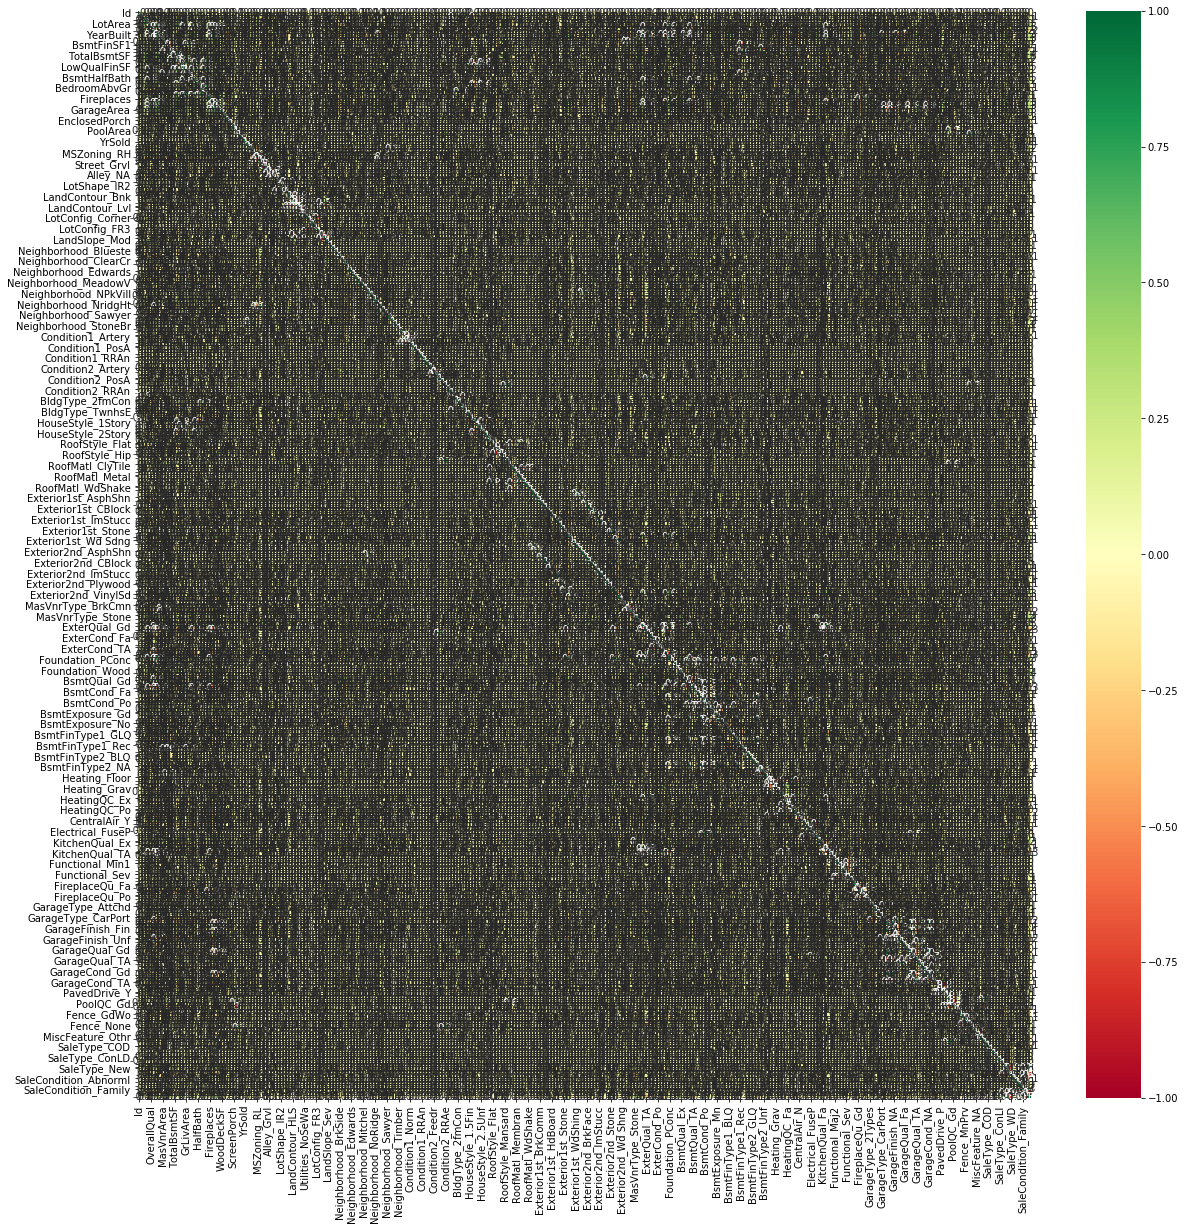

In [15]:
#check correlation
corrmat = train.corr().round(1)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [21]:
train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=286)

In [17]:

#drop correlated columns
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9 or corrmat.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

In [18]:
len(selected_columns)

286

In [23]:
selected_columns = train.iloc[:,1:].columns
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                try:
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                        x = np.delete(x, j, 1)
                        columns = np.delete(columns, j)
                except:
                    continue
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(train.iloc[:,1:].values, target.values, SL, selected_columns)

In [24]:
len(selected_columns)
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [25]:
len(selected_columns)

data = pd.DataFrame(data = data_modeled, columns = selected_columns)


In [26]:
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       ...
       'PavedDrive_Y', 'PoolQC_NA', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'Fence_None', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object', length=120)

In [29]:
#split_data
x_train, x_test, y_train, y_test = train_test_split(data.values,target.values, test_size = 0.2)

In [30]:
target

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.128117
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
Name: SalePrice, Length: 1459, dtype: float64

In [31]:
scaler = StandardScaler()   
scaler=scaler.fit(x_train)
pickle.dump(scaler,open('scaler.pkl','wb'))

scaler=pickle.load(open('scaler.pkl','rb'))
x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [32]:
names = ["GBM","XGB","LGBM"]
#XGBRegressor(max_delta_step=2,scale_pos_weight=100)   -  "XGB"
regressors = [GradientBoostingRegressor(n_estimators=100,random_state=0,verbose=1),
    XGBRegressor(max_delta_step=2,scale_pos_weight=100,random_state=0) ,
    LGBMRegressor(n_estimators=100,random_state=0,num_leaves=40,learning_rate=0.5)]

In [33]:
rmse_cv=[]
rmse_test=[]
#num_leaves=150, objective='regression',max_depth=7,learning_rate=.05,max_bin=200
for name,model in zip(names,regressors):
    print(name, model)
    score = cross_val_score(model, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
    y_pred=model.predict(x_test)
    score_test=mean_squared_error(y_test,y_pred)
    rmse_test.append(score_test.mean())
    print('Rmse',score.mean())
    rmse.append(score.mean())

GBM GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)
      Iter       Train Loss   Remaining Time 
         1           0.1356            0.79s
         2           0.1179            0.78s
         3           0.1028            0.78s
         4           0.0906            0.77s
         5           0.0804            0.76s
         6           0.0716            0.63s
         7       

In [34]:
rmse

[-0.00021880609688638636, -0.00020093498646298085, -0.00028059800359426016]

In [52]:

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,5,7],'min_samples_split':[2,5,10], 'max_features':[3,4],'n_estimators':[100,500,1000,2000],
              'scale_pos_weight':[50,100,500,1000],'max_delta_step':[1,3,5]}

model=XGBRegressor()
model = GridSearchCV(model, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')
model3=GradientBoostingRegressor()
model3 = GridSearchCV(model3, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

model2=LGBMRegressor(max_delta_step=2,scale_pos_weight=100)
model2 = GridSearchCV(model2, param_grid=parameters,cv=5,verbose=10,scoring='neg_mean_squared_log_error')

print(model)
model.fit(x_train, y_train)

#score = model.score(np.array(x_test), y_test)
#y_pred=model.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_delta_step': [1, 3, 5], 'max_depth': [3, 5, 7],
                         'max_features': [3, 4],
           

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[00:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[00:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[00:18:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s remaining:    0.0s


[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.2s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[00:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[00:18:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[00

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[00:19:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[00:19:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[00

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[00:20:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[00:20:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weigh

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.5s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[00:21:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.6s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[00:22:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.5s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weig

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.017, total=   0.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[00:22:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[00:22:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[00:22:

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[00:22:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[00:22:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[0

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[00:24:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.5s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[00:24:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[00:27:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[00:27:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   3.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[00:28:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   4.1s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[00:28:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[00:29:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.8s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[00:29:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  19.6s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[00:32:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  20.3s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[00:33:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  19.6s
[CV] max_delta_step=1, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[00:35:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[00:35:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   4.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[00:36:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   3.8s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[00:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   7.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 


[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  22.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[00:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  22.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[00:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  23.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[00

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[00:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[00:47:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[00:47:2

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   4.8s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[00:48:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   4.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[00:48:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   4.7s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[00

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.1s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[00:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.0s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[00:51:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  10.6s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  21.2s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[00:56:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  20.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[00:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  20.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[01:00:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[01:00:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.017, total=   0.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[01:01:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   4.5s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[01:01:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   4.4s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weigh

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   9.8s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[01:04:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   9.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[01:05:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   9.3s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_po

[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.7s
[CV] max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[01:11:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[01:11:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[01:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[01:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.8s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[01:12:30

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[01:15:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  14.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[01:15:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  14.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[01:21:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[01:22:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  20.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[01:25:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[01:25:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[01

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   7.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[01:27:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   7.7s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[01:27:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   7.9s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[0

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  14.7s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[01:32:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  14.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[01:32:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  14.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  18.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[01:39:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.1s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[01:39:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.0s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weig

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[01:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[01:39:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   7.0s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[01:43:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[01:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  15.0s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  19.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[01:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  18.3s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[01:49:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.4s
[CV] max_delta_step=1, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[01:53:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[01:53:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[01

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   7.0s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[01:54:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[01:55:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   6.8s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[01

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[01:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[01:59:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  15.0s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  19.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[02:05:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  18.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[02:06:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[02:07:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[02:07:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.017, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[02:10:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.8s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[02:10:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[0

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  18.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[02:15:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  18.3s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[02:16:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  20.2s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[02

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.5s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[02:21:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[02:21:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 


[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[02:22:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.9s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[02:22:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   7.0s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  14.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[02:26:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  15.6s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[02:26:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  14.7s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.4s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[02:32:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  18.7s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[02:32:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  18.7s
[CV] max_delta_step=1, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[02:35:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[02:35:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[02

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   9.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[02:37:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   9.6s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[02:37:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   8.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  15.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[02:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  23.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[02:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  21.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[02:47:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[02:48:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 


[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[02:48:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   9.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[02:48:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   9.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[02:48:53

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  17.8s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[02:52:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  11.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[02:52:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  10.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  15.8s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[02:57:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  15.7s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[02:57:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[03:00:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[03:00:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=  20.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[03:02:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=  10.0s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[03:03:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=  10.3s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  11.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[03:06:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  11.5s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[03:07:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  11.4s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  15.8s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[03:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  16.3s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[03:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  14.9s
[CV] max_delta_step=1, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[03:13:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[03:13:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  11.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[03:16:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  10.9s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[03:17:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  11.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[03

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  16.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[03:21:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  15.2s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[03:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[0

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[03:26:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[03:26:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[03:

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   9.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[03:27:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   9.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[03:27:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=  10.0s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[03

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  11.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[03:31:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  10.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[03:31:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  11.9s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  16.0s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[03:36:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[03:36:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  15.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.017, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[03:38:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[03:38:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.016, total=   0.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weigh

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   8.8s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[03:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   9.7s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[03:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=  10.1s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weig

[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  11.5s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[03:45:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  12.0s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[03:45:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  15.4s
[CV] max_delta_step=1, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_we

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[03:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[03:51:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[03:51:03

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[03:51:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   4.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[03:51:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[03:51

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   9.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[03:54:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   9.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[03:54:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  12.0s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  19.5s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[03:59:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  19.5s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[03:59:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  19.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[04:03:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[04:03:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[04

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   4.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[04:04:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[04:04:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   4.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[04:08:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  10.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[04:08:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  10.0s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[04:14:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[04:15:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=5

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[04:15:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[04:15:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   5.4s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[04

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[04:17:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[04:17:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1

[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  19.9s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[04:22:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  20.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[04:22:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  19.7s
[CV] max_delta_step=3, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weig

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[04:27:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[04:27:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[04

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   5.3s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[04:28:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   5.4s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[04:28:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   7.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[04

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[04:31:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[04:31:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  10.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  20.5s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[04:37:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  20.0s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[04:38:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  20.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weigh

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[04:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[04:39:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[04:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[04:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   9.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[04

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  20.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[04:46:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  21.7s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[04:46:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  21.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[0

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[04:54:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[04:54:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.2s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[04:55:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[04:56:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   6.3s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  15.6s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[04:59:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  12.7s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[04:59:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  12.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  26.1s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[05:07:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  25.8s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[05:07:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  25.9s
[CV] max_delta_step=3, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[05:11:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[05:11:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[0

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   8.9s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[05:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   9.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[05:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   8.9s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  15.6s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[05:19:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  15.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[05:19:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  15.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weig

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[05:27:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[05:27:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[05:27

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[05:28:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   8.7s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[05:28:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   9.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[05:28:2

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  15.0s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[05:32:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  16.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[05:32:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  16.0s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  20.6s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[05:38:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  19.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[05:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.9s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[05:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[05:42:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.7s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[05:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.0s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[05:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.0s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  15.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[05:49:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.5s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[05:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=  14.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_w

[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  24.2s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[05:56:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.1s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[05:56:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  18.9s
[CV] max_delta_step=3, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_po

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[05:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[05:57:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   7.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[05

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  14.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[06:01:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  15.9s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[06:01:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  15.6s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[06

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  18.6s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[06:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  18.5s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[06:07:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=  18.2s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 


[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[06:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[06:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[06

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   7.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[06:13:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   8.5s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[06:14:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   7.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[06

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  15.9s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[06:18:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.7s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[06:18:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  18.5s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[06:24:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  18.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[06:25:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=  19.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weigh

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[06:27:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[06:27:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   1.3s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weig

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   9.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[06:29:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   9.1s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[06:30:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=  17.5s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weigh

[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  21.4s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[06:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  22.8s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[06:36:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=  31.6s
[CV] max_delta_step=3, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   1.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[06:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[06:43:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[06:43:3

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=  11.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[06:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=  10.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[06:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=  11.3s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[06

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  14.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[06:50:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=  13.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[06:50:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=  14.2s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  20.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[06:56:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  17.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[06:56:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=  18.3s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[06:59:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[06:59:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   2.0s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 


[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=  10.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[07:03:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=  11.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[07:03:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   8.8s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[07:05:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[07:05:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.7s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=5

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[07:06:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[07:06:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[07

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[07:07:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[07:07:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[0

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[07:08:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[07:08:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[07:09:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[07:09:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[07:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[07:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[07

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[07:11:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[07:11:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[07

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[07:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[07:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weigh

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[07:14:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   4.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[07:14:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weig

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[07:14:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[07:14:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[07:14:

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[07:15:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[07:15:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.3s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[0

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[07:17:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[07:17:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[07:18:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[07:18:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.5s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[07:18:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[07:18:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.9s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.6s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[07:20:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.2s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[07:20:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.7s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[07:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[07:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=3, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[07:22:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[07:22:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[07:22:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[07:22:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 


[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[07:23:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[07:23:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[07

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[07:25:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[07:25:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[07:25:3

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[07:25:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[07:25:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[07

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[07:26:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[07:26:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   6.0s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[07:28:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[07:28:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[07:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[07:29:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[07:29:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[07:29:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weigh

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[07:30:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.1s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[07:30:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=1000, scale_po

[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[07:32:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[07:32:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=5

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[07:32:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[07:32:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[07:32:48

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[07:33:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[07:33:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[07:34:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[07:34:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[07:36:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[07:36:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[07

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[07:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[07:36:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[0

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[07:37:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[07:37:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[07:39:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[07:39:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weig

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.3s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[07:39:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[07:39:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   1.4s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[07:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[07:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.2s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=5

[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[07:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[07:41:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.7s
[CV] max_delta_step=5, max_depth=3, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[07:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[07:43:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=100 
[07

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[07:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[07:43:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=500 
[07

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.1s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[07:44:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500 
[07:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[07:46:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[07:46:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[07:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000 
[07:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[07:48:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[07:48:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   4.5s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50 
[0

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[07:49:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[07:49:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=50 
[07

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[07:51:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[07:51:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=100 


[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[07:51:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100 
[07:51:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   4.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[07:52:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   4.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100 
[07:52:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   4.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[07:54:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.4s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500 
[07:54:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_wei

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[07:55:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[07:55:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=500 
[07

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.5s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[07:56:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000 
[07:56:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=1000

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   4.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[07:57:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   6.8s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000 
[07:57:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   4.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000 
[07:59:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 
[07:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=50 


[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.6s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[07:59:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[08:00:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=50 
[08:00:03

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   4.2s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[08:01:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   4.2s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100 
[08:01:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   4.1s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=100

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.2s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[08:02:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100 
[08:02:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   5.5s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100 
[08:03:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500 
[08:03:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[08:04:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500 
[08:04:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   2.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[08:05:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500 
[08:05:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   4.2s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_wei

[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   5.3s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[08:07:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   5.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000 
[08:07:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   7.4s
[CV] max_delta_step=5, max_depth=5, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[08:08:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.5s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000 
[08:08:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=500, scale_pos_weight=50 

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[08:09:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.3s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[08:09:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=1000, scale_pos_weight=50 
[08

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.8s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[08:10:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50 
[08:10:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[0

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[08:12:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[08:12:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=100, scale_pos_weight=100 
[08:

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[08:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100 
[08:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=500, scale_pos_weight=500 
[08

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.4s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[08:13:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.3s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500 
[08:13:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=500, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=1000, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.8s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[08:15:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500 
[08:15:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=5, n_estimators=2000, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[08:16:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.5s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=1000 
[08:16:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weight=1000, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=100, scale_pos_weigh

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.7s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[08:16:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000 
[08:16:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=500, scale_pos_weig

[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000 
[08:18:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50 
[08:18:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   4.8s
[CV] max_delta_step=5, max_depth=7, max_features=3, min_samples_split=10, n_estimators=2000, scale_pos_we

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[08:19:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[08:19:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=100, scale_pos_weight=50 
[08:19:49

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.9s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50 
[08:20:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[08:20:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=500, scale_pos_weight=100 
[08:20

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.3s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[08:21:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100 
[08:21:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=100, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=1000, scale_pos_weight=10

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.7s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100 
[08:22:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.7s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500 
[08:22:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=500, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=2, n_estimators=2000, scale_pos_weight=50

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[08:23:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[08:23:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500, score=-0.000, total=   0.5s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=100, scale_pos_weight=500 
[08

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=500, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[08:24:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000 
[08:24:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000, score=-0.000, total=   2.7s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=500, scale_pos_weight=1000

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.3s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[08:25:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000 
[08:25:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weight=1000, score=-0.000, total=   3.5s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=1000, scale_pos_weig

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000 
[08:27:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=5, n_estimators=2000, scale_pos_weight=1000, score=-0.000, total=   4.7s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50 
[08:27:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=50, score=-0.000, total=   0.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=100, scale_pos_weight=5

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.8s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[08:27:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   2.7s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[08:27:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50, score=-0.000, total=   3.0s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=500, scale_pos_weight=50 
[08

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[08:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.4s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50 
[08:28:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=50, score=-0.000, total=   3.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=1000, scale_pos_weight=1

[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=50, score=-0.000, total=   5.0s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[08:30:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.5s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100 
[08:30:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weight=100, score=-0.000, total=   4.6s
[CV] max_delta_step=5, max_depth=7, max_features=4, min_samples_split=10, n_estimators=2000, scale_pos_weig

[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 492.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_delta_step': [1, 3, 5], 'max_depth': [3, 5, 7],
                         'max_features': [3, 4],
           

In [54]:
model_cv=model.best_estimator_
#model_lgbm=model2.best_estimator_

print(model_cv)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=3,
             max_depth=3, max_features=3, min_child_weight=1,
             min_samples_split=2, missing=None, n_estimators=500, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=50, seed=None, silent=None,
             subsample=1, verbosity=1)


In [37]:
rmse

[-0.00021880609688638636, -0.00020093498646298085, -0.00028059800359426016]

In [55]:
score = model_cv.score(np.array(x_test), y_test)

In [56]:
score=cross_val_score(model_cv, x_test, y_test, cv=5, scoring='neg_mean_squared_log_error')
print('Rmse',score.mean())

[10:32:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:32:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Rmse -0.00019610220116405842


## Test set predictions

In [40]:
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       ...
       'PavedDrive_Y', 'PoolQC_NA', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'Fence_None', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object', length=120)

In [41]:
model_cv.feature_importances_

array([1.13886430e-02, 3.27066708e-02, 2.46350366e-02, 1.15303041e-01,
       1.12104204e-02, 8.93162766e-02, 2.36061722e-02, 3.58079234e-02,
       5.74372492e-02, 8.41620439e-02, 2.43882272e-03, 3.01241614e-02,
       9.49056423e-03, 5.47544463e-03, 2.65793898e-03, 4.35619506e-05,
       1.39078420e-03, 5.45547011e-04, 1.28842800e-02, 1.38843528e-02,
       1.73866662e-04, 1.17651588e-04, 7.17951021e-04, 1.88406069e-04,
       8.64906425e-04, 9.78727518e-04, 1.02337790e-03, 1.58750387e-04,
       1.18224869e-02, 3.99973251e-04, 1.04670027e-03, 9.09090699e-04,
       1.37230520e-03, 9.68004827e-04, 1.13724080e-03, 9.37358858e-04,
       5.66200868e-03, 2.46067034e-03, 1.71878023e-03, 3.12978915e-04,
       1.50574594e-02, 1.37595592e-03, 1.95053704e-04, 9.17966732e-04,
       1.56434494e-03, 9.25345255e-05, 6.31628578e-05, 7.64384000e-04,
       1.14087769e-03, 3.94799370e-04, 4.94782999e-04, 5.14220283e-06,
       0.00000000e+00, 2.52459382e-04, 0.00000000e+00, 1.74016418e-05,
      

In [57]:
test.shape

(1459, 304)

In [58]:
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       ...
       'PavedDrive_Y', 'PoolQC_NA', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'Fence_None', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object', length=120)

In [59]:
new=test[selected_columns]

In [60]:
#data.shape
new.shape

(1459, 120)

In [46]:
#test['Neighborhood'].replace({'NAmes':'Names'},inplace=True)
# test['Neighborhood'].value_counts()

# for i in set(categorical_vars).intersection(set(selected_columns)):
#     print(test[i].value_counts(dropna=False))


In [65]:
# data = pd.DataFrame(data = test, columns = selected_columns)
# x_test=data.values
X_test= scaler.transform(new.values)
test['SalePrice']=model_cv.predict(X_test)

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
test['SalePrice']=np.exp(test['SalePrice'])

C:\Users\Ankita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
test[['Id', 'SalePrice']].to_csv('test_submission_xgb_transformed_y_v1.csv',index=False)

In [67]:
test['SalePrice']

0       120655.664062
1       156667.593750
2       187693.343750
3       188905.484375
4       188316.937500
            ...      
1454     77867.429688
1455     85146.937500
1456    173513.000000
1457    117101.835938
1458    230288.000000
Name: SalePrice, Length: 1459, dtype: float32

In [151]:
y_train

array([143250., 129900., 166000., ..., 176432., 128000., 271000.])